<h1 style="color:blue; background:lightblue; line-height:1.5; text-align:center">* Quora Question Pair Similarity using BERT and ML Models like XGBoost and Random Forest Classifier*</h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<h2 style="color:blue; background:pink; line-height:1.5">Import required libraries</h2>

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

<h2 style="color:blue; background:pink; line-height:1.5">Loading Dataset which has extracted features and Preprocessed</h2>

**Dataset link:** https://drive.google.com/file/d/1rxPJHAvSXzOPEpIqmaAsXvhJK8p4K4JN/view?usp=sharing


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Final_ Project_Quora_Question_Pair_Similarity/data/train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


<h2 style="color:blue; background:pink; line-height:1.5">Dataset information</h2>

In [ ]:
df.shape

(404290, 6)

In [ ]:
df.size

2425740

In [ ]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

<h2 style="color:blue; background:pink; line-height:1.5">Missing values</h2>

In [ ]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

<h2 style="color:blue; background:pink; line-height:1.5">Duplicate Rows</h2>

In [ ]:
df.duplicated().sum()

0

<h2 style="color:blue; background:pink; line-height:1.5">Data Balance check</h2>


In [ ]:
class_balance=pd.DataFrame(df['is_duplicate'].value_counts()).reset_index()
class_balance.columns=["Class", "Count"]
class_balance['Percentage']=(class_balance['Count']/df.shape[0])*100
class_balance

,Class,Count,Percentage
0,0,255024,63.079941
1,1,149263,36.920059


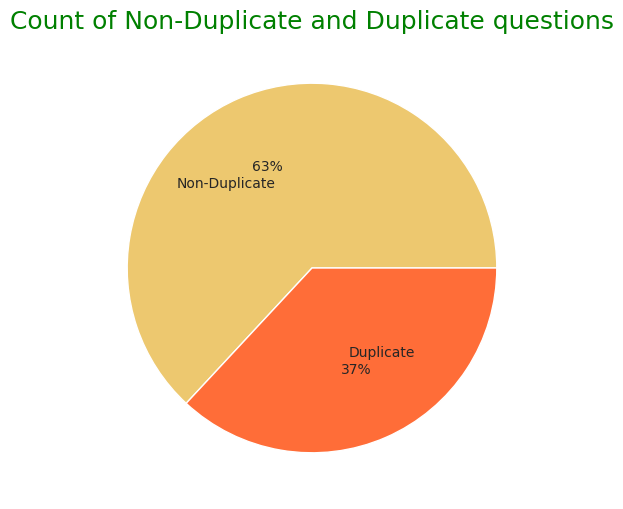

In [ ]:
label=['Non-Duplicate', 'Duplicate'] 
color=sns.color_palette('rainbow')[4:6]
plt.figure(figsize=(6,6))
plt.pie(x=class_balance['Count'], labels=label, colors=color, autopct='%.0f%%' , labeldistance=0.5)
plt.title("Count of Non-Duplicate and Duplicate questions", fontsize=18, color='green');

<h2 style="color:blue; background:pink; line-height:1.5">Text Preprocessing</h2>

In [ ]:
#!pip install contractions

In [ ]:
import contractions
import re

In [ ]:
#balanced=balanced[['question1','question2','is_duplicate']]
balanced=df[['question1','question2','is_duplicate']]

In [ ]:
def clean_test_for_sample_data(text):
    text=str(text).lower()
    text=text.replace('%', ' percent')
    text=text.replace('$', ' dollar ')
    text=text.replace('₹', ' rupee ')
    text=text.replace('€', ' euro ')
    text=text.replace('@', ' at ')
        
    text=text.replace(',000,000,000 ', 'b ')
    text=text.replace(',000,000 ', 'm ')
    text=text.replace(',000 ', 'k ')
    text=re.sub(r'([0-9]+)000000000', r'\1b', text)
    text=re.sub(r'([0-9]+)000000', r'\1m', text)
    text=re.sub(r'([0-9]+)000', r'\1k', text)
    pattern=re.compile('\W')
    text=re.sub(pattern, ' ', text).strip()
    #text=" ".join(text)
    text=re.sub("<.*?>", "", text)
    text=contractions.fix(text)
    text=re.sub(" +", " ", text)
    #text=text.strip()
    return text

balanced['question1']=balanced['question1'].apply(clean_test_for_sample_data)
balanced['question2']=balanced['question2'].apply(clean_test_for_sample_data)
pd.options.display.max_colwidth=10000000000000
balanced.head()

,question1,question2,is_duplicate
0,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0
2,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0
3,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is divided by 24 23,0
4,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0


<h2 style="color:blue; background:pink; line-height:1.5">Feature Extraction</h2>

<h2 style="color:blue; background:pink; line-height:1.5">1. Basic Features</h2>

In [ ]:
# 1. Question length
balanced['que1_len']=balanced['question1'].str.len()
balanced['que2_len']=balanced['question2'].str.len()

# 2. Number of words
balanced['que1_num_words'] =balanced['question1'].apply(lambda sent: len(sent.split()))
balanced['que2_num_words'] =balanced['question2'].apply(lambda sent: len(sent.split()))

# 3. Total words in both question
def total_words(row):
    q1_w=set(map(lambda x: x.lower().strip(), row['question1'].split()))
    q2_w=set(map(lambda x: x.lower().strip(), row['question2'].split()))
    return len(q1_w) + len(q2_w)

balanced['total_words']=balanced.apply(total_words, axis=1)

# 4. Common words in both questions
def common_words(row):
    q1_w=set(map(lambda x: x.lower().strip(), row['question1'].split()))
    q2_w=set(map(lambda x: x.lower().strip(), row['question2'].split()))
    return len(q1_w)&len(q2_w)

balanced['common_words']=balanced.apply(common_words, axis=1)

# 5. Word sharing
balanced['shared_words'] = round(balanced['common_words']/balanced['total_words'], 2)

balanced.head(2)

,question1,question2,is_duplicate,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words
0,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,65,56,14,12,23,8,0.35
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,48,85,10,15,24,10,0.42


<h2 style="color:blue; background:pink; line-height:1.5">2. Token Based Features</h2>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

def extract_token_features(row):
    q1=row['question1']
    q2=row['question2']
    SAFE_DIV=0.0001
    STOP_WORDS=stopwords.words("english")   #Stopwords
    token_features=[0.0]*8
    
    q1_tokens=q1.split()    #tokens in question1
    q2_tokens=q2.split()    #tokens in question2
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features

    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])     #non-stopwords in question1
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])     #non-stopwords in question2
    
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])         #stopwords in question1
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])         #stopwords in question2
    
    common_word_count = len(q1_words.intersection(q2_words))                   #non-stopword count
    common_stop_count = len(q1_stops.intersection(q2_stops))                   #common stopword count
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))        #common token count
    
    token_features[0]=common_word_count/(min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1]=common_word_count/(max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2]=common_stop_count/(min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3]=common_stop_count/(max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4]=common_token_count/(min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5]=common_token_count/(max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])   #last word same or not
    token_features[7]=int(q1_tokens[0]==q2_tokens[0])     #first word same or not
    
    return token_features

In [ ]:
token_features=balanced.apply(extract_token_features, axis=1)

balanced["cwc_min"]=list(map(lambda x: x[0], token_features))
balanced["cwc_max"]=list(map(lambda x: x[1], token_features))
balanced["csc_min"]=list(map(lambda x: x[2], token_features))
balanced["csc_max"]=list(map(lambda x: x[3], token_features))
balanced["ctc_min"]= list(map(lambda x: x[4], token_features))
balanced["ctc_max"]=list(map(lambda x: x[5], token_features))
balanced["last_word_eq"]=list(map(lambda x: x[6], token_features))
balanced["first_word_eq"]=list(map(lambda x: x[7], token_features))

balanced.head(2)

,question1,question2,is_duplicate,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,65,56,14,12,23,8,0.35,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,48,85,10,15,24,10,0.42,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0


<h2 style="color:blue; background:lightgreen; line-height:1.5"> Analyze Token Based Features</h2>

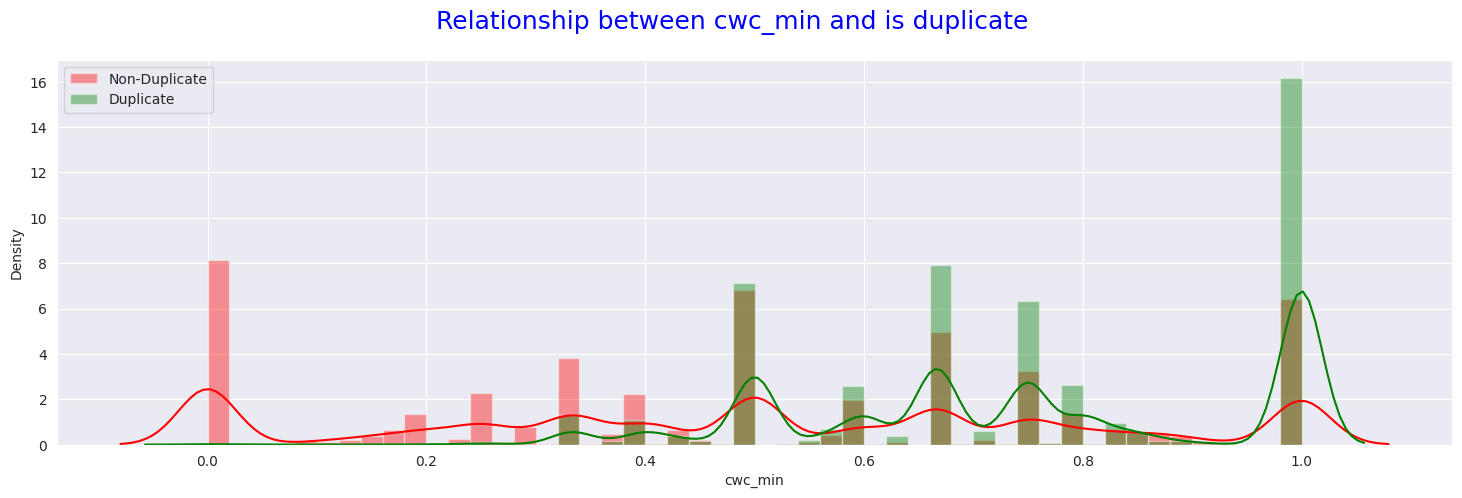

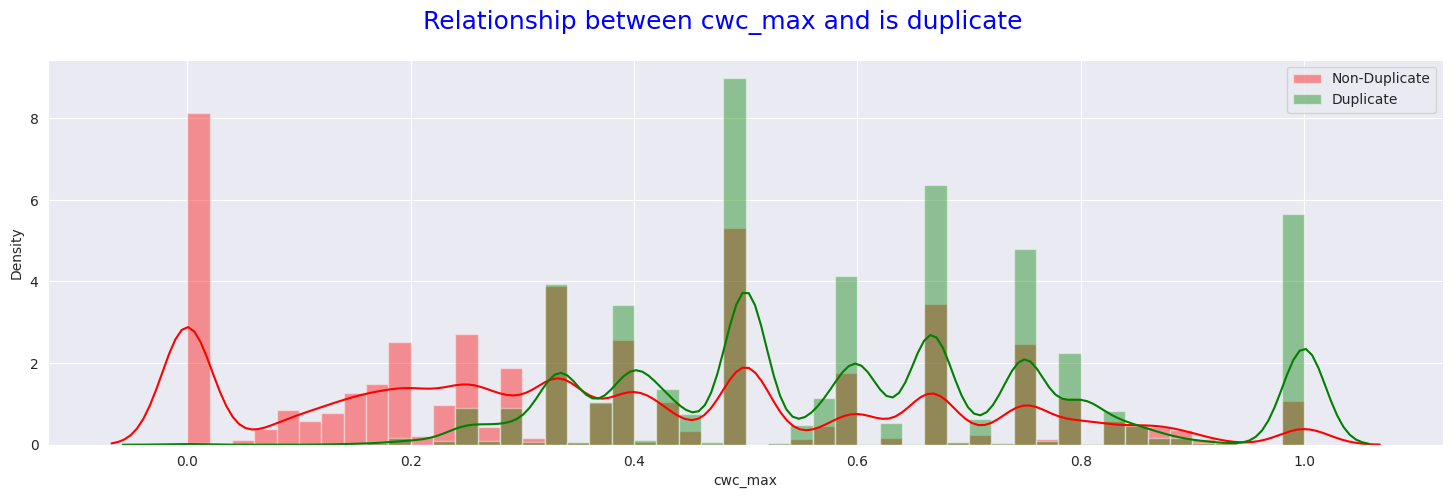

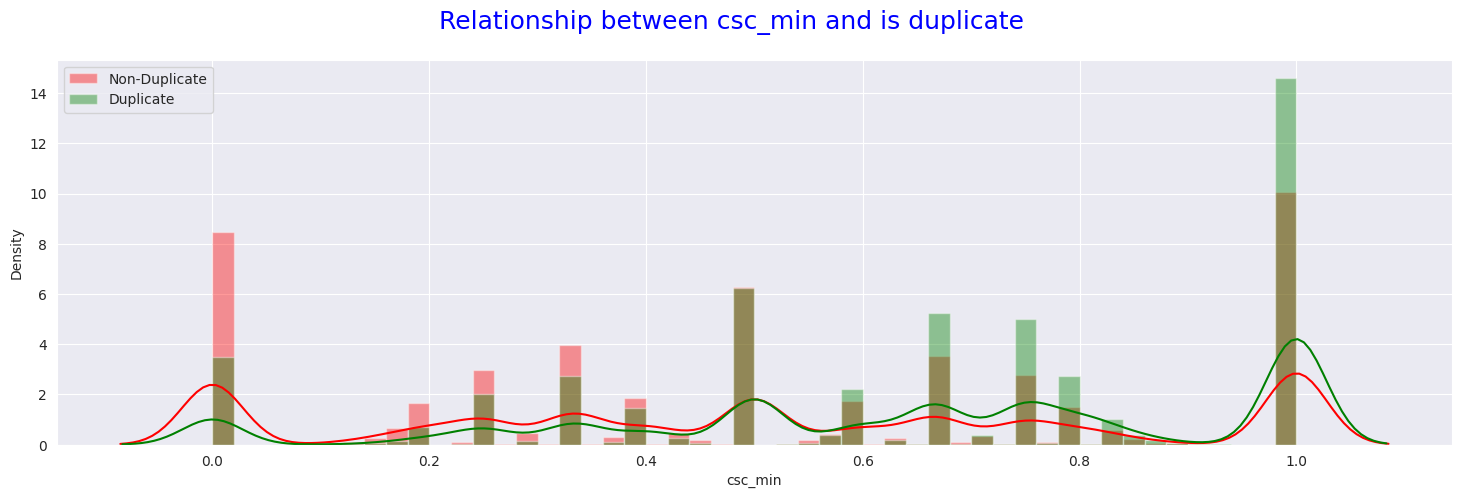

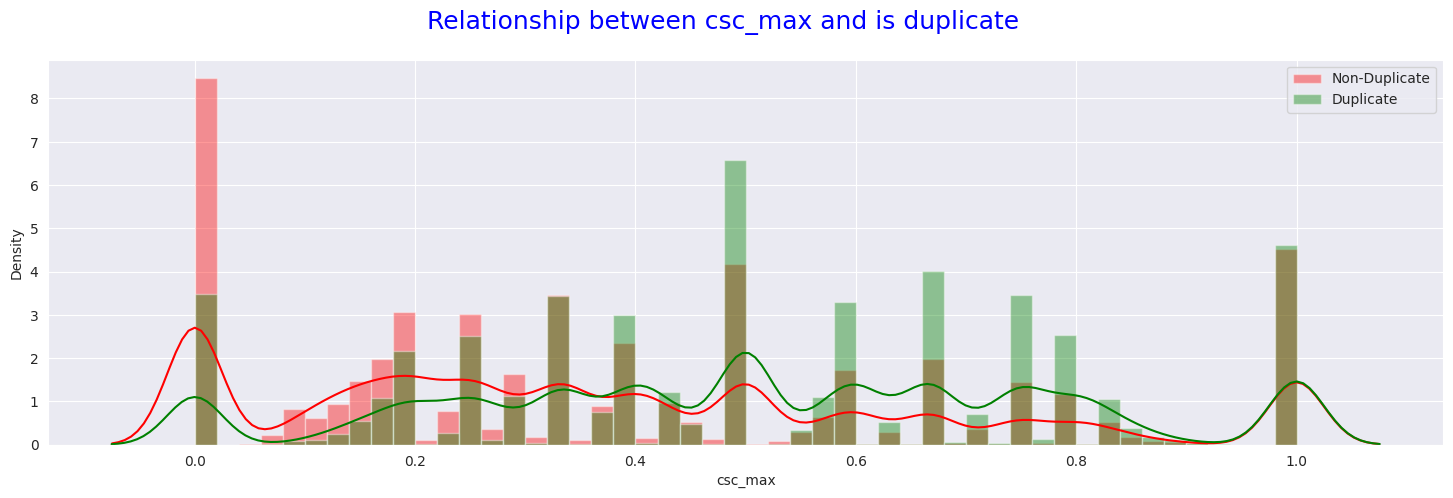

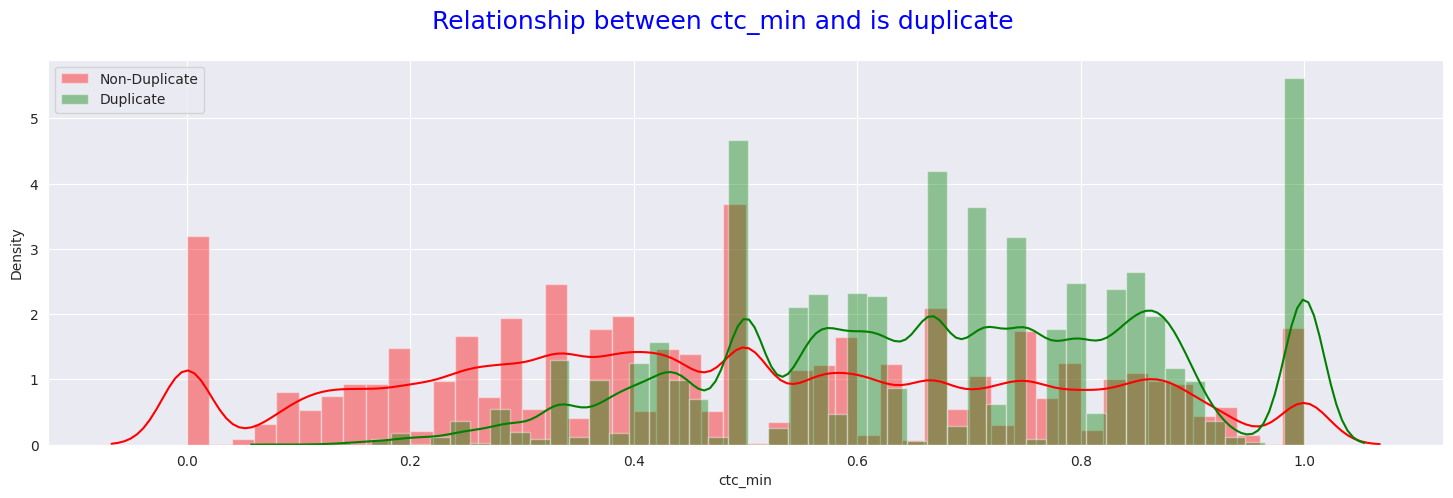

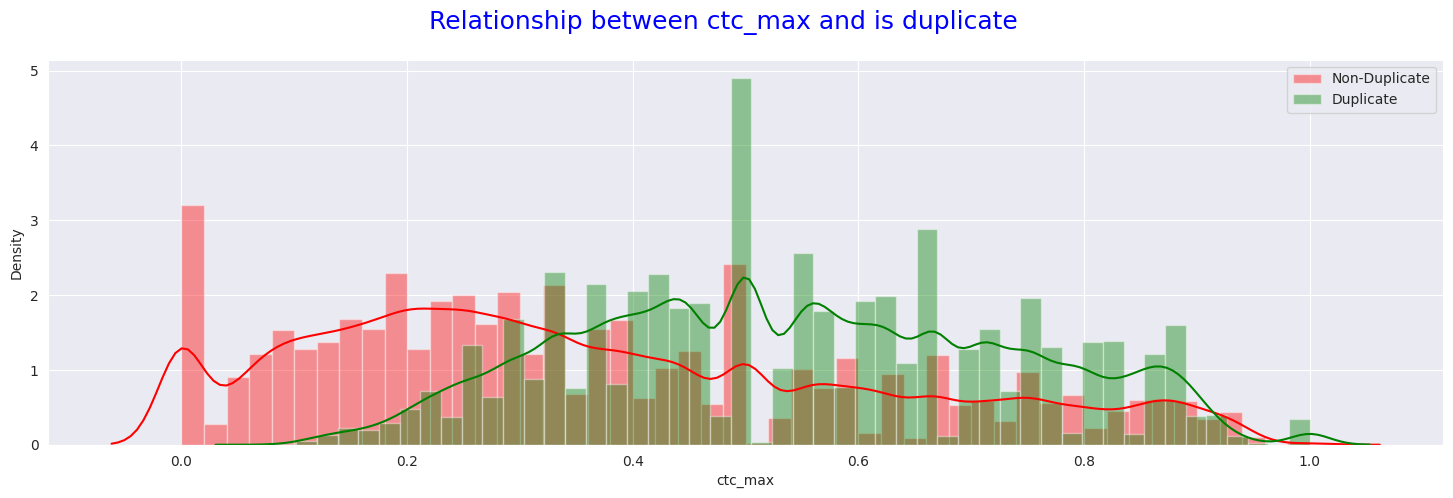

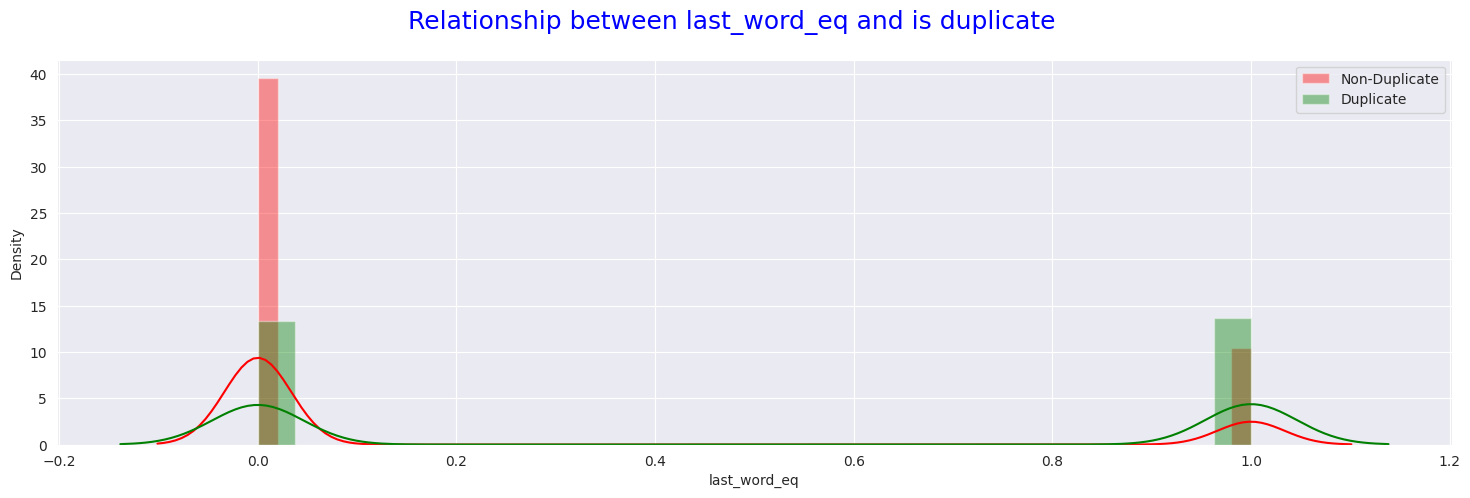

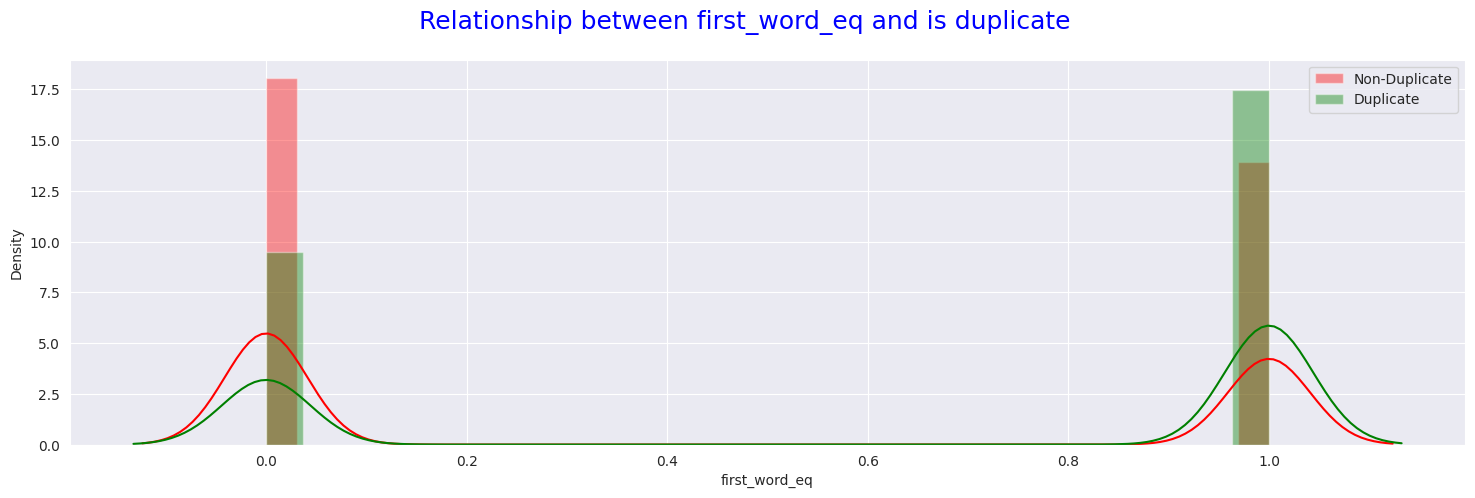

In [ ]:
token_features_df=balanced[['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'first_word_eq']]
for col in token_features_df.columns:
    plt.figure(figsize=(18,5))
    sns.distplot(balanced[balanced['is_duplicate'] == 0][col], label='Non-Duplicate', color='red')
    sns.distplot(balanced[balanced['is_duplicate'] == 1][col], label='Duplicate', color='green')
    plt.legend();
    plt.suptitle("Relationship between {} and is duplicate".format(col), color='blue', fontsize=18);

<h2 style="color:blue; background:pink; line-height:1.5">3. Length Based Features</h2>

In [ ]:
!pip install distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=3c9e4819dd60b6e581dd93ff6a509c85bd8cea67da04c80610041ebaf1de9ae1
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
import distance
def extract_length_features(row):
    q1=row['question1']
    q2=row['question2']
    length_features=[0.0]*3
    
    q1_tokens=q1.split()   #question1 token
    q2_tokens=q2.split()   #question2 token
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    
    length_features[0]=abs(len(q1_tokens) - len(q2_tokens))            #absolute length
    length_features[1]=(len(q1_tokens) + len(q2_tokens))/2             #average token length
    strs=list(distance.lcsubstrings(q1, q2))                           #longest substring
    length_features[2]=len(strs) / (min(len(q1), len(q2)) + 1)         #longest substring ratio
    
    return length_features

In [ ]:
length_features=balanced.apply(extract_length_features, axis=1)

balanced['abs_len_diff']=list(map(lambda x: x[0], length_features))
balanced['mean_len']=list(map(lambda x: x[1], length_features))
balanced['long_substr_ratio']=list(map(lambda x: x[2], length_features))

balanced.head(2)

,question1,question2,is_duplicate,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio
0,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,65,56,14,12,23,8,0.35,...,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,0.017544
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,48,85,10,15,24,10,0.42,...,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,0.020408


<h2 style="color:blue; background:lightgreen; line-height:1.5">Analyze Length Based Features</h2>

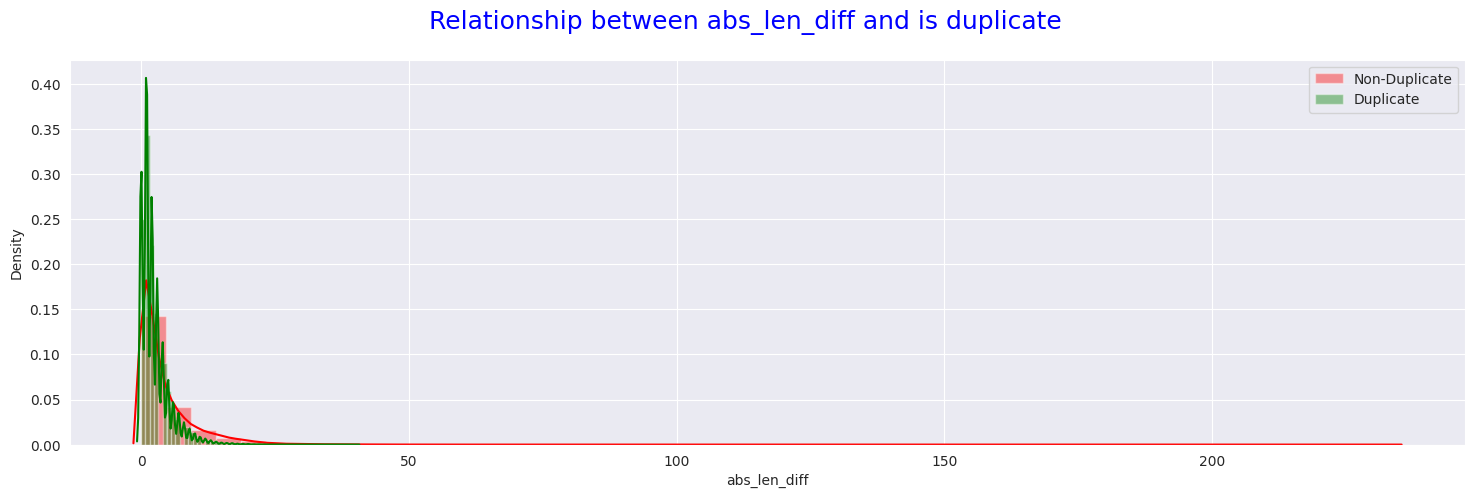

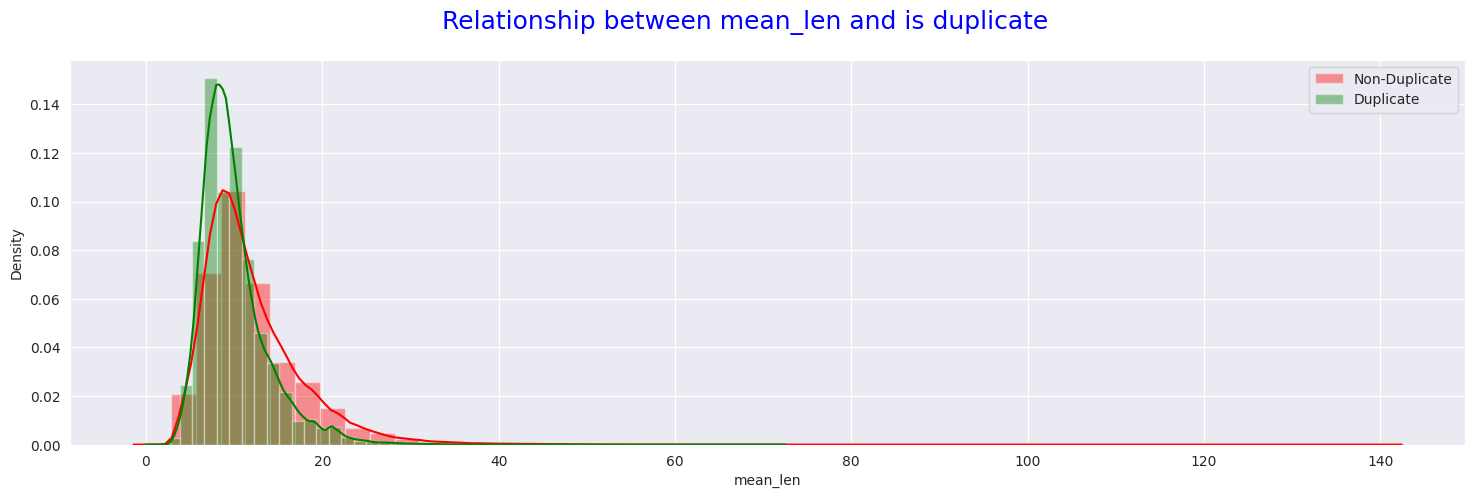

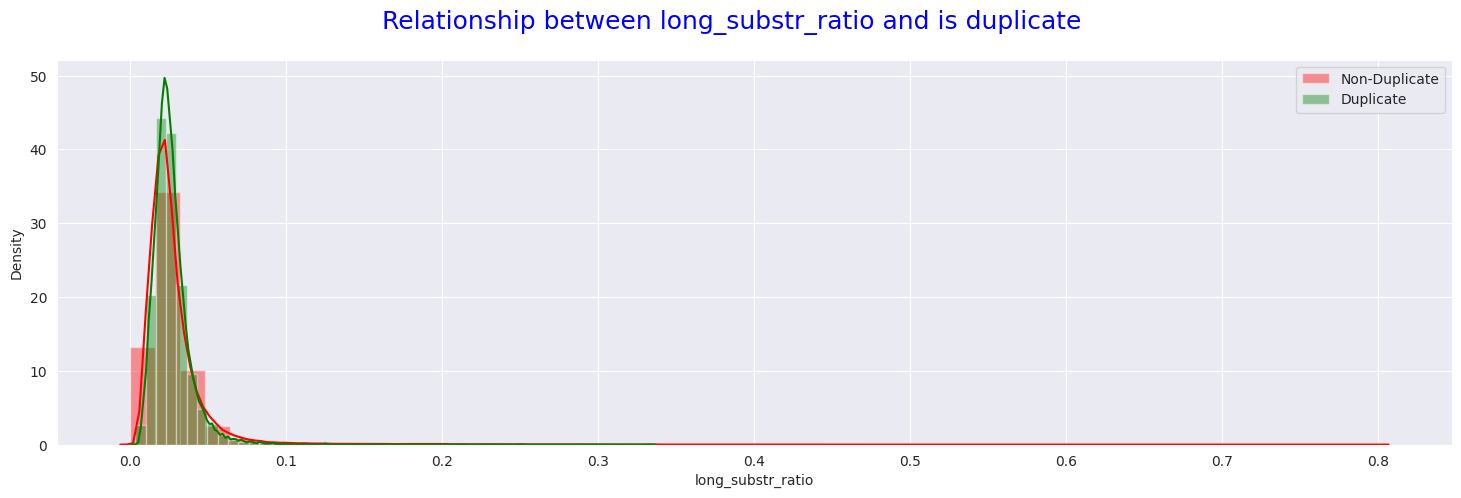

In [ ]:
length_features_df=balanced[['abs_len_diff','mean_len','long_substr_ratio']]
for col in length_features_df.columns:
    plt.figure(figsize=(18,5))
    sns.distplot(balanced[balanced['is_duplicate'] == 0][col], label='Non-Duplicate', color='red')
    sns.distplot(balanced[balanced['is_duplicate'] == 1][col], label='Duplicate', color='green')
    plt.legend();
    plt.suptitle("Relationship between {} and is duplicate".format(col), color='blue', fontsize=18);

<h2 style="color:blue; background:pink; line-height:1.5">4. Fuzzy Features</h2>

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fuzzywuzzy import fuzz
def extract_fuzzy_features(row):
    q1=row['question1']
    q2=row['question2']
    fuzzy_features=[0.0]*4
    
    fuzzy_features[0]=fuzz.QRatio(q1, q2)              #fuzzy ration
    fuzzy_features[1]=fuzz.partial_ratio(q1, q2)       #fuzzy partial_ratio
    fuzzy_features[2]=fuzz.token_sort_ratio(q1, q2)    #token sort ratio
    fuzzy_features[3]=fuzz.token_set_ratio(q1, q2)     #token set ratio

    return fuzzy_features

In [ ]:
fuzzy_features=balanced.apply(extract_fuzzy_features, axis=1)

balanced['fuzz_ratio']=list(map(lambda x: x[0], fuzzy_features))
balanced['fuzz_partial_ratio']=list(map(lambda x: x[1], fuzzy_features))
balanced['token_sort_ratio']=list(map(lambda x: x[2], fuzzy_features))
balanced['token_set_ratio']=list(map(lambda x: x[3], fuzzy_features))

balanced.head(2)

,question1,question2,is_duplicate,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,65,56,14,12,23,8,0.35,...,0.785709,0.0,1.0,2.0,13.0,0.017544,93,100,93,100
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,48,85,10,15,24,10,0.42,...,0.466664,0.0,1.0,5.0,12.5,0.020408,65,73,63,86


<h2 style="color:blue; background:lightgreen; line-height:1.5">Analyze Fuzzy Features</h2>

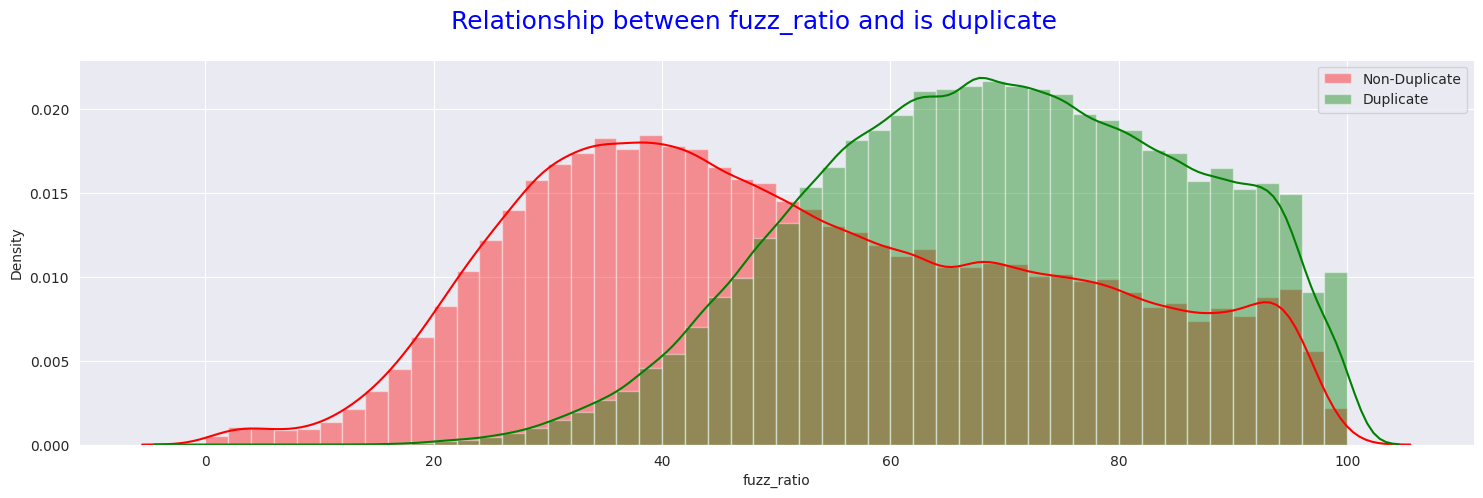

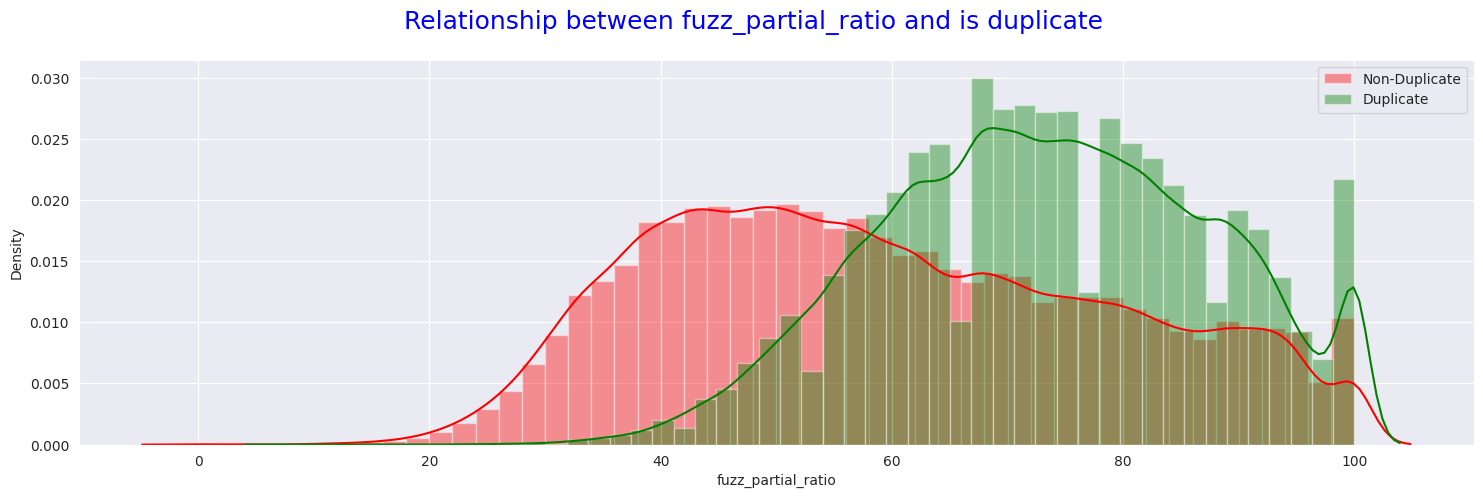

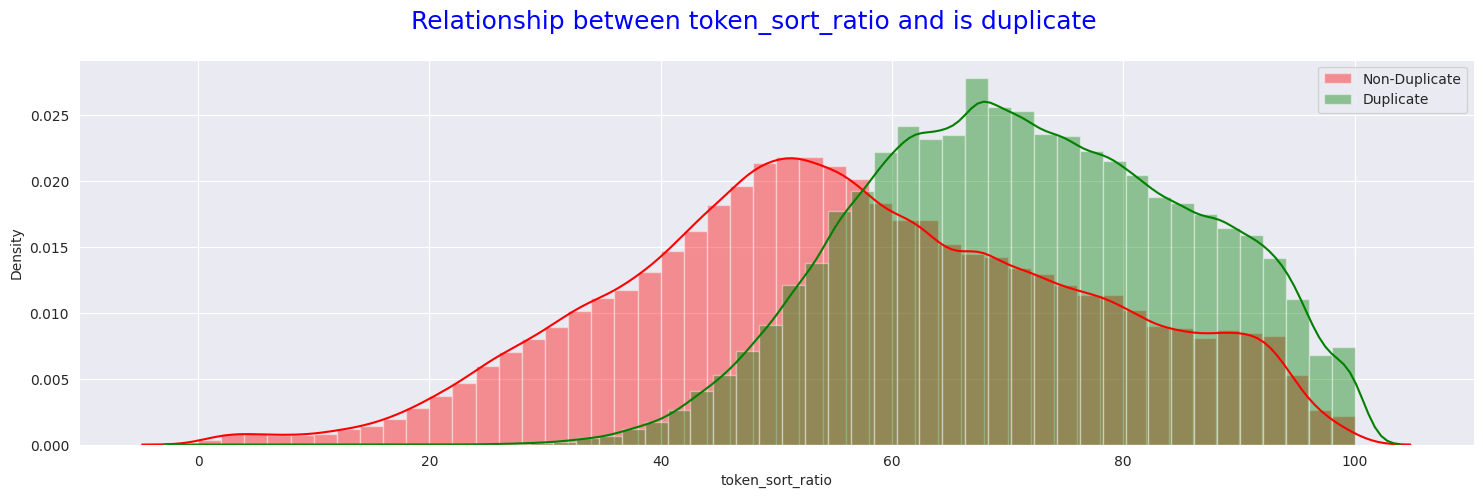

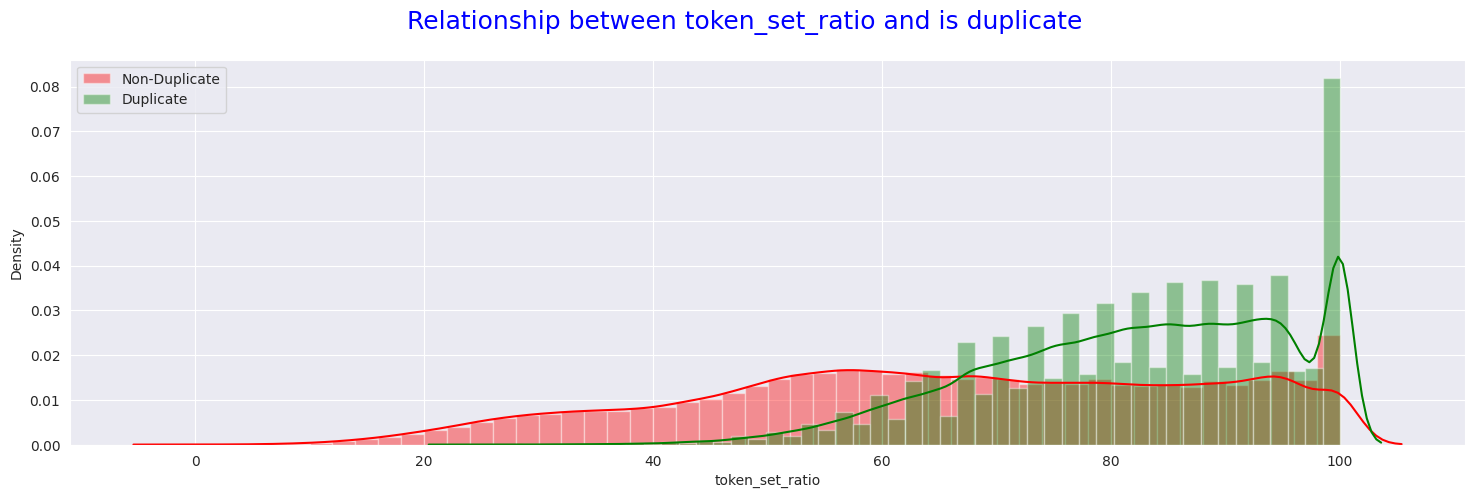

In [ ]:
fuzzy_features_df=balanced[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio']]
for col in fuzzy_features_df.columns:
    plt.figure(figsize=(18,5))
    sns.distplot(balanced[balanced['is_duplicate'] == 0][col], label='Non-Duplicate', color='red')
    sns.distplot(balanced[balanced['is_duplicate'] == 1][col], label='Duplicate', color='green')
    plt.legend();
    plt.suptitle("Relationship between {} and is duplicate".format(col), color='blue', fontsize=18);

### Save this dataset with extreacted features

**Link to clean and extracted feature dataset:** https://drive.google.com/file/d/1j-jEzJi93tHhcMgZDX1dnGTaBYq9ZO8W/view?usp=sharing

In [3]:
#balanced.to_csv("/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Final_ Project_Quora_Question_Pair_Similarity/data/feat_extr_data_full.csv", index=False)
balanced=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Final_ Project_Quora_Question_Pair_Similarity/data/feat_extr_data_full.csv")
balanced.head(5)

,question1,question2,is_duplicate,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,23,8,0.35,...,0.785709,0.0,1.0,2.0,13.0,0.017544,93,100,93,100
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,24,10,0.42,...,0.466664,0.0,1.0,5.0,12.5,0.020408,65,73,63,86
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,24,10,0.42,...,0.285712,0.0,1.0,4.0,12.0,0.016949,43,46,63,63
3,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,0,48,59,11,13,20,10,0.50,...,0.000000,0.0,0.0,2.0,12.0,0.163265,9,11,24,28
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,20,5,0.25,...,0.307690,0.0,1.0,6.0,10.0,0.102564,36,55,47,67


In [4]:
balanced.shape

(404287, 25)

In [5]:
balanced.isna().sum()

question1             14
question2              6
is_duplicate           0
que1_len               0
que2_len               0
que1_num_words         0
que2_num_words         0
total_words            0
common_words           0
shared_words           0
cwc_min                0
cwc_max                0
csc_min                0
csc_max                0
ctc_min                0
ctc_max                0
last_word_eq           0
first_word_eq          0
abs_len_diff           0
mean_len               0
long_substr_ratio      0
fuzz_ratio             0
fuzz_partial_ratio     0
token_sort_ratio       0
token_set_ratio        0
dtype: int64

In [6]:
balanced.dropna(inplace=True)
balanced.isna().sum()

question1             0
question2             0
is_duplicate          0
que1_len              0
que2_len              0
que1_num_words        0
que2_num_words        0
total_words           0
common_words          0
shared_words          0
cwc_min               0
cwc_max               0
csc_min               0
csc_max               0
ctc_min               0
ctc_max               0
last_word_eq          0
first_word_eq         0
abs_len_diff          0
mean_len              0
long_substr_ratio     0
fuzz_ratio            0
fuzz_partial_ratio    0
token_sort_ratio      0
token_set_ratio       0
dtype: int64

In [7]:
balanced.duplicated().sum()

722

In [8]:
balanced.drop_duplicates(inplace=True)
balanced.duplicated().sum()

0

In [9]:
balanced.shape

(403545, 25)

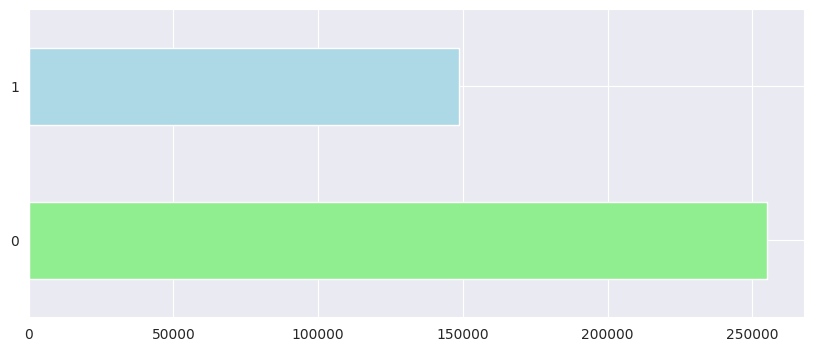

In [10]:
balanced['is_duplicate'].value_counts().plot(kind='barh', figsize=(10,4), color=['lightgreen','lightblue']);

<h2 style="color:blue; background:pink; line-height:1.5">Divide Data into Input and Output</h2>

In [11]:
X=balanced.drop('is_duplicate', axis=1)
y=balanced['is_duplicate']
print(X.shape, y.shape)

(403545, 24) (403545,)


<h2 style="color:blue; background:pink; line-height:1.5">Train Test Split</h2>

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

(322836, 24) (322836,) (80709, 24) (80709,)


<h2 style="color:blue; background:pink; line-height:1.5">Seperate Extracted features and BERT to Question1 and Question2 Seperately and concatenate extracted features to question1 and question2 vectors to create final train and test data.</h2>

In [13]:
x_train_questions1=list(x_train['question1'])
x_train_questions2=list(x_train['question2'])
x_test_questions1=list(x_test['question1'])
x_test_questions2=list(x_test['question2'])
print(x_train_questions1[1])
print(x_test_questions1[1])
print("--"*30)

which is the best phone under 15k rs
who was lilith in the bible
------------------------------------------------------------


In [14]:
extracted_features=['que1_len', 'que2_len',
       'que1_num_words', 'que2_num_words', 'total_words', 'common_words',
       'shared_words', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'long_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio']

x_train_extracted_features=x_train[extracted_features]
x_test_extracted_features=x_test[extracted_features]

x_train_extracted_features[:2]

,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,cwc_min,cwc_max,csc_min,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
63713,33,36,8,7,15,0,0.00,0.499988,0.499988,0.333322,...,0.374995,0.0,1.0,1.0,7.5,0.029412,72,76,64,70
178107,36,46,8,10,18,8,0.44,0.499988,0.333328,0.499988,...,0.399996,0.0,1.0,2.0,9.0,0.027027,56,56,63,71


<h2 style="color:blue; background:pink; line-height:1.5">Create Document vector for both question in train and test using pre-trained BERT</h2>

In [15]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=680cfe70689b49499113728bf7d60fea708a3b5460d1f00a0e5d243e74885971
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [16]:
from sentence_transformers import SentenceTransformer, util
model=SentenceTransformer('all-MiniLM-L6-v2')

In [17]:
x_train_doc_vector1=list(x_train['question1'].apply(model.encode))
x_train_doc_vector2=list(x_train['question2'].apply(model.encode))

x_test_doc_vector1=list(x_test['question1'].apply(model.encode))
x_test_doc_vector2=list(x_test['question2'].apply(model.encode))

In [18]:
x_train_doc_vector1[1]

array([-8.12758878e-02,  7.97640160e-02,  4.68593873e-02, -5.87859452e-02,
       -3.52876373e-02, -6.47080541e-02,  1.18022468e-02,  9.94597897e-02,
        3.20564993e-02,  6.55860826e-02,  4.16296832e-02,  1.57432221e-02,
       -7.40429480e-03,  5.46066239e-02,  2.92498618e-02,  6.24299143e-03,
        1.40225574e-01, -4.74890582e-02,  1.11886105e-02, -8.26000571e-02,
       -1.80358402e-02, -4.90214415e-02, -1.20414197e-02, -1.26732793e-02,
        7.74891451e-02,  2.52224668e-03,  3.31285270e-03, -2.84841359e-02,
       -4.02982272e-02, -6.50394559e-02,  8.23059455e-02,  5.64559102e-02,
        6.69962689e-02, -7.25294575e-02, -2.09523365e-02, -1.66900344e-02,
       -2.21545901e-02, -5.92139587e-02,  9.93696135e-03, -8.12860951e-03,
       -5.02785742e-02,  5.90396971e-02, -7.46188015e-02, -3.56025249e-02,
        4.84454446e-02, -7.94878751e-02,  7.09468173e-03,  7.54594654e-02,
        4.82207630e-03,  1.14925485e-02, -9.91474837e-03,  5.13554960e-02,
       -1.22493654e-02,  

<h2 style="color:blue; background:pink; line-height:1.5">Finalize training and testing data</h2>

In [19]:
x_train_extracted_features_array=np.array(x_train_extracted_features)
x_test_extracted_features_array=np.array(x_test_extracted_features)

x_train_embedded_document_array=np.hstack((x_train_doc_vector1, x_train_doc_vector2))
x_test_embedded_document_array=np.hstack((x_test_doc_vector1, x_test_doc_vector2))

x_train=np.hstack((x_train_extracted_features_array, x_train_embedded_document_array))
x_test=np.hstack((x_test_extracted_features_array, x_test_embedded_document_array))

y_train=np.array(y_train)
y_test=np.array(y_test)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(322836, 790) (322836,) (80709, 790) (80709,)


<h2 style="color:blue; background:pink; line-height:1.5">Building Machine Learning Model</h2>

<h2 style="color:blue; background:pink;">Set Experiment<h2>

In [20]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=273acb21413627dad3b7ad7582046b6125a99f8830ee28de9edec1d3c5a8db67
  Stored in directory: /root/.cache/pip/wheel

In [21]:
import mlflow
mlflow.set_experiment("Advance_approach_using_pre_trained_BERT")

2023/06/06 06:48:44 INFO mlflow.tracking.fluent: Experiment with name 'Advance_approach_using_pre_trained_BERT' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/803706398296542041', creation_time=1686034124807, experiment_id='803706398296542041', last_update_time=1686034124807, lifecycle_stage='active', name='Advance_approach_using_pre_trained_BERT', tags={}>

<h2 style="color:blue; background:lightgreen; line-height:1.5">1. XG Boost Classifier<h2>

----------------------------------------------------------
Acuuracy=0.8532753472351287
Precission=0.789837731519423
Recall=0.8160541913632515
F1 Score=0.8027319673496586
----------------------------------------------------------
Confusion Matrix=



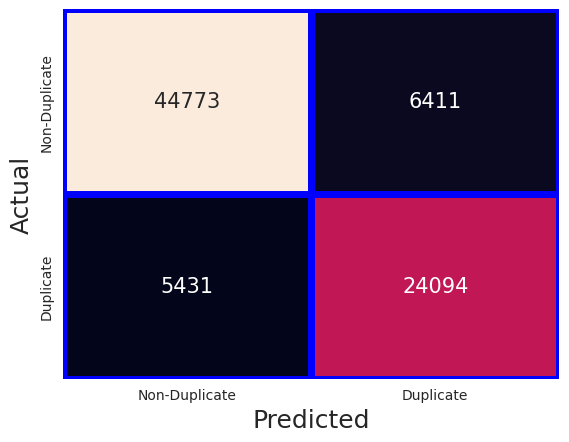

----------------------------------------------------------
Out of 80709 testing values 11842 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     51184
           1       0.79      0.82      0.80     29525

    accuracy                           0.85     80709
   macro avg       0.84      0.85      0.84     80709
weighted avg       0.85      0.85      0.85     80709

----------------------------------------------------------


In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import pickle
with mlflow.start_run():
    mlflow.set_tag("Owner","Suraj H")
    mlflow.set_tag("Algorithm", "XG Boost")
    
    xgb_classifier=XGBClassifier()
    xgb_classifier.fit(x_train,y_train)
    pickle.dump(xgb_classifier, open("/content/resources_advance_approach_using_pre_trained_model/xgboost_.pkl","wb"))
    
    y_pred=xgb_classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    print("----------------------------------------------------------")
    print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
    print("----------------------------------------------------------")
    print("Confusion Matrix=\n")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
                yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
    plt.xlabel("Predicted",fontsize=18)
    plt.ylabel("Actual",fontsize=18)
    plt.savefig("/content/resources_advance_approach_using_pre_trained_model/xgboost_conf_matrix.png")
    plt.show()
    print("----------------------------------------------------------")
    print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
    print("----------------------------------------------------------")
    print("Classification Report=\n", classification_report(y_test,y_pred))
    print("----------------------------------------------------------")
    
    mlflow.log_metrics({"Accuracy":acc, "Precision":precision, "Recall":recall, "F1 Score":f1})
    mlflow.sklearn.log_model(xgb_classifier, artifact_path="models")
    mlflow.log_artifact("/content/resources_advance_approach_using_pre_trained_model/xgboost_conf_matrix.png")

<h2 style="color:blue; background:lightgreen; line-height:1.5">2. Random Forest Classifier<h2>

----------------------------------------------------------
Acuuracy=0.8423224175742482
Precission=0.8274531207360337
Recall=0.7188823031329382
F1 Score=0.7693562418442801
----------------------------------------------------------
Confusion Matrix=



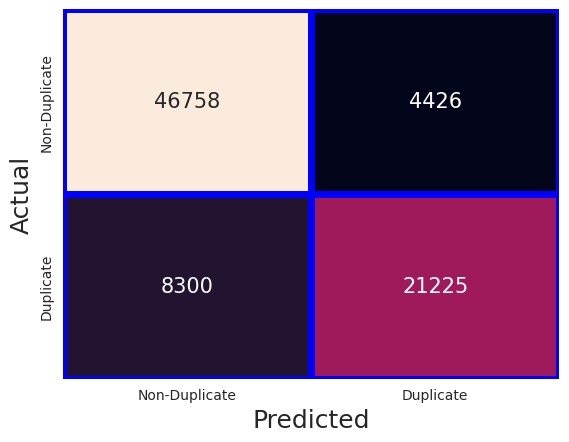

----------------------------------------------------------
Out of 80709 testing values 12726 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.85      0.91      0.88     51184
           1       0.83      0.72      0.77     29525

    accuracy                           0.84     80709
   macro avg       0.84      0.82      0.82     80709
weighted avg       0.84      0.84      0.84     80709

----------------------------------------------------------


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import pickle
with mlflow.start_run():
    mlflow.set_tag("Owner","Suraj H")
    mlflow.set_tag("Algorithm", "Random Forest")
    
    rf_classifier=RandomForestClassifier()
    rf_classifier.fit(x_train,y_train)
    pickle.dump(rf_classifier, open("/content/resources_advance_approach_using_pre_trained_model/random_forest.pkl","wb"))
    
    y_pred=rf_classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    print("----------------------------------------------------------")
    print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
    print("----------------------------------------------------------")
    print("Confusion Matrix=\n")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
                yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
    plt.xlabel("Predicted",fontsize=18)
    plt.ylabel("Actual",fontsize=18)
    plt.savefig("/content/resources_advance_approach_using_pre_trained_model/random_forest_conf_matrix.png")
    plt.show()
    print("----------------------------------------------------------")
    print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
    print("----------------------------------------------------------")
    print("Classification Report=\n", classification_report(y_test,y_pred))
    print("----------------------------------------------------------")
    
    mlflow.log_metrics({"Accuracy":acc, "Precision":precision, "Recall":recall, "F1 Score":f1})
    mlflow.sklearn.log_model(rf_classifier, artifact_path="models")
    mlflow.log_artifact("/content/resources_advance_approach_using_pre_trained_model/random_forest_conf_matrix.png")

### XGBoost classifier has highest accuracy of 85.3%.

In [25]:
import shutil
shutil.make_archive('mlruns', 'zip', 'mlruns')

shutil.make_archive('resources_advance_approach_using_pre_trained_model', 'zip', 'resources_advance_approach_using_pre_trained_model')

'/content/resources_advance_approach_using_pre_trained_model.zip'